
Перед вами задача классификации космических объектов.
Датасет взят отсюда
fedesoriano. (January 2022). Stellar Classification Dataset - SDSS17. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17
The data released by the SDSS is under public domain. Its taken from the current data release RD17.
More information about the license: http://www.sdss.org/science/image-gallery/
SDSS Publications:
Abdurro’uf et al., The Seventeenth data release of the Sloan Digital Sky Surveys: Complete Release of MaNGA, MaStar and APOGEE-2 DATA (Abdurro’uf et al. submitted to ApJS) [arXiv:2112.02026]

Целевая переменная называется class.

Решите задачу методами случайного леса, и рассмотренными на уроке бустингами.
Оцените результаты с помощью метрик presicion и recall.


Творческая задача (из раздела машинное зрение).
Рассмотрим колесо от тележки, которая движется по рельсу. Подшипник колеса закрыт металлическим колпаком, колпак прикручен к колесу четырьмя болтами, болты визуально различимы.


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split


sns.set_style("darkgrid")

In [1]:
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [15]:
df = pd.read_csv("star_classification.csv")
df.head(3)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [17]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [18]:
df["class"]=[0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in df["class"]]

In [19]:
df["rerun_ID"].value_counts()

301    100000
Name: rerun_ID, dtype: int64

In [20]:
df["run_ID"].value_counts()

3699    2450
4263    2295
3225    2275
2964    2009
7717    1782
        ... 
6514       1
1336       1
297        1
287        1
6074       1
Name: run_ID, Length: 430, dtype: int64

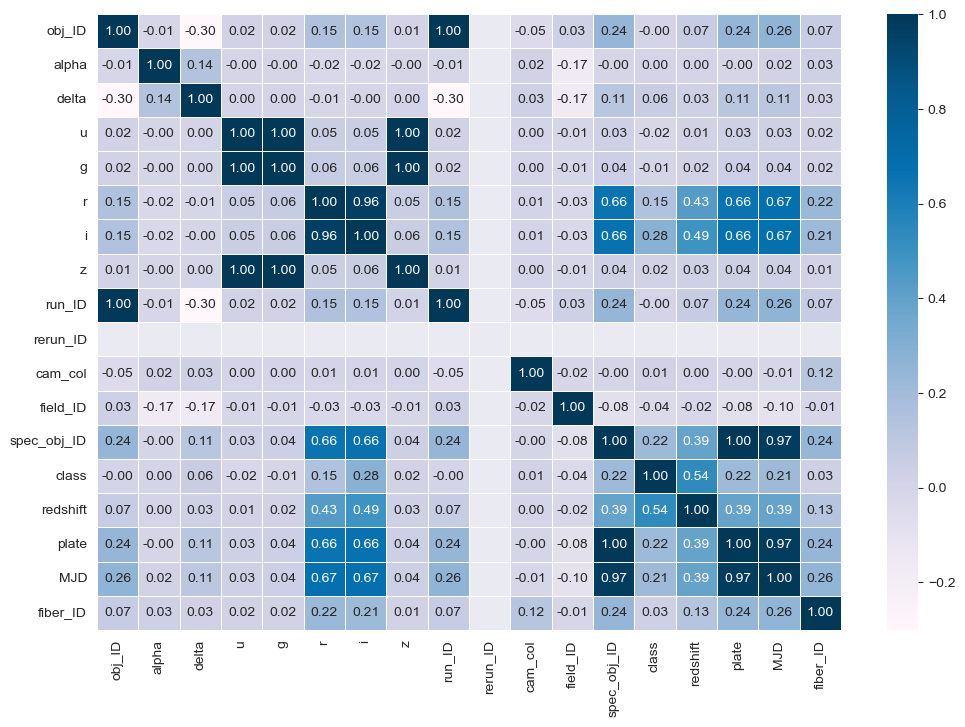

In [22]:

f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

In [23]:
corr = df.corr()
corr["class"].sort_values()

field_ID      -0.038044
u             -0.017701
g             -0.005915
run_ID        -0.000049
obj_ID        -0.000047
alpha          0.004552
cam_col        0.014476
z              0.017352
fiber_ID       0.032053
delta          0.056643
r              0.150691
MJD            0.207262
spec_obj_ID    0.215722
plate          0.215722
i              0.284396
redshift       0.536822
class          1.000000
rerun_ID            NaN
Name: class, dtype: float64

In [24]:
df = df.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)

In [25]:
X = df.drop(['class'], axis = 1)
y = df.loc[:,'class'].values

In [ ]:
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

In [27]:

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### RandomForestClassifier

In [29]:
forest_cls = RandomForestClassifier()
forest_cls.fit(x_train,y_train)
predicted_forest_cls = forest_cls.predict(x_test)

In [30]:
print(classification_report(y_test, predicted_forest_cls))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11860
           1       1.00      1.00      1.00      4343
           2       0.96      0.93      0.95      3797

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000



### GradientBoostingClassifier

In [31]:
gbc_cls = GradientBoostingClassifier(n_estimators = 200,
                                max_depth = 4,
                                random_state = 15)
gbc_cls.fit(x_train,y_train)
predicted_gbc_cls = gbc_cls.predict(x_test)

In [32]:
print(classification_report(y_test, predicted_gbc_cls))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11860
           1       1.00      1.00      1.00      4343
           2       0.96      0.93      0.94      3797

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000

